# Simple Linear Regression

In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv(r"D:\Sushmitha\Susuhmi\Salary.csv")

# Exploratory Data Analysis (EDA)

## Explore the dataset

In [3]:
print(dataset.head())         

   YearsExperience  Salary
0              1.1   39343
1              1.3   46205
2              1.5   37731
3              2.0   43525
4              2.2   39891


In [4]:
print(dataset.shape)	       

(30, 2)


In [5]:
print(dataset.columns)	       

Index(['YearsExperience', 'Salary'], dtype='object')


In [6]:
print(dataset.info())         

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes
None


In [7]:
print(dataset.isnull().sum()) 

YearsExperience    0
Salary             0
dtype: int64


In [8]:
print(dataset.describe()) 

       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000


# Data Visualization

In [9]:
import matplotlib.pyplot as plt

### import matplotlib.pyplot as plt

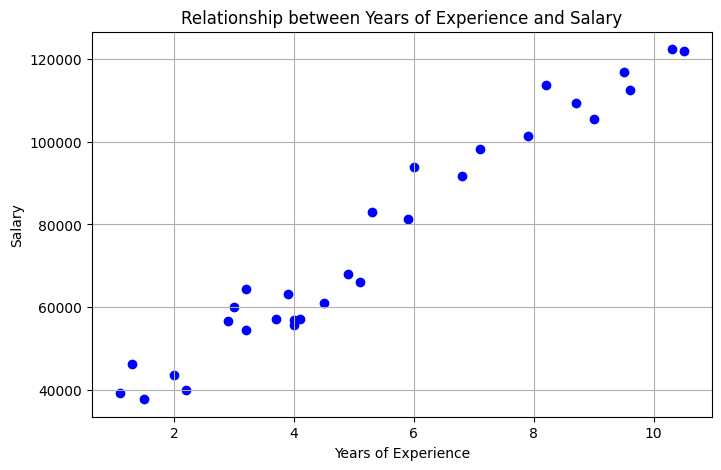

In [10]:
plt.figure(figsize=(8, 5))
plt.scatter(dataset['YearsExperience'], dataset['Salary'], color='blue')
plt.title('Relationship between Years of Experience and Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

#### Distribution of Years of Experience in the Dataset

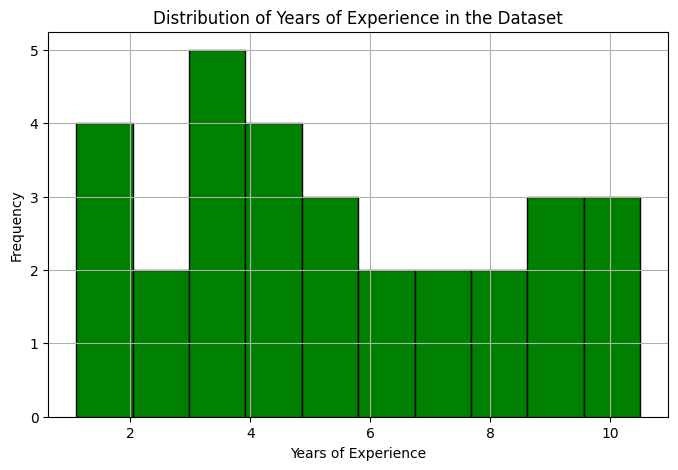

In [11]:
plt.figure(figsize=(8, 5))
plt.hist(dataset['YearsExperience'], bins=10, color='green', edgecolor='black')
plt.title('Distribution of Years of Experience in the Dataset')
plt.xlabel('Years of Experience')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Model Building

## Selecting Feature and Target

In [15]:
X = dataset[['YearsExperience']] 
Y = dataset['Salary'] 

In [16]:
X.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


#### Split the dataset into training and testing sets (80% train, 20% test)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [19]:
dataset.shape

(30, 2)

In [20]:
X_train.shape

(24, 1)

In [21]:
X_test.shape

(6, 1)

## Train the Simple Linear Regression model on the Training set

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
regressor = LinearRegression()

In [24]:
regressor.fit(X_train, y_train)

LinearRegression()

# Make Predictions with Test Data

In [25]:
y_pred = regressor.predict(X_test)

In [26]:
print("Actual Salary:\n", y_test[:5]) 
print("\nPredicted Salary:\n", y_pred[:5])

Actual Salary:
 2      37731
28    122391
13     57081
10     63218
26    116969
Name: Salary, dtype: int64

Predicted Salary:
 [ 40748.96184072 122699.62295594  64961.65717022  63099.14214487
 115249.56285456]


In [27]:
import numpy as np

In [28]:
y_pred = np.round(y_pred, 2)  

In [29]:
print("Actual Salary:\n", y_test[:5])
print("\nPredicted Salary:\n", y_pred[:5])

Actual Salary:
 2      37731
28    122391
13     57081
10     63218
26    116969
Name: Salary, dtype: int64

Predicted Salary:
 [ 40748.96 122699.62  64961.66  63099.14 115249.56]


## Evaluate the Model

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 

In [31]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) 
r2 = r2_score(y_test, y_pred) 
mae = mean_absolute_error(y_test,y_pred)

In [32]:
print("\nModel Evaluation:")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2 Score): {r2:.2f}")


Model Evaluation:
Root Mean Squared Error (RMSE): 3580.98
Mean Absolute Error (MAE): 2446.17
R-squared (R2 Score): 0.99


### Making prediction for new data

In [33]:
new_data = pd.DataFrame({
    'YearsExperience': [10],
})
new_data

,YearsExperience
0,10


In [34]:
predicted_salary = regressor.predict(new_data)
predicted_salary

array([119905.85041792])

In [35]:
print(f"Predicted salary for 10 years of experience: {predicted_salary[0]:,.2f}/-")

Predicted salary for 10 years of experience: 119,905.85/-


In [36]:
multiple_new_data = pd.DataFrame({
    'YearsExperience': [5, 10, 15]
})
multiple_new_data

,YearsExperience
0,5
1,10
2,15


In [37]:
predicted_salaries = regressor.predict(multiple_new_data)

In [38]:
for years_exp, salary in zip(multiple_new_data['YearsExperience'], predicted_salaries):
    print(f"Predicted salary for {years_exp} years of experience: {salary:.2f}/-")

Predicted salary for 5 years of experience: 73342.97/-
Predicted salary for 10 years of experience: 119905.85/-
Predicted salary for 15 years of experience: 166468.73/-
